# COB Explanatory Data Analysis
## Analyzing correlations, preparing Data for further investigation

Author> Pedro Ciancaglini

In [ ]:
# Importing the requiered libraries for this Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
%matplotlib inline

In [ ]:
# Mounting Drive to access to Datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COB/Train_26_8.csv')
#test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COB/Test_188.csv')
results_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COB/Results_26_8.csv')
results_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COB/Results_26_8.csv')

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format # Setting float format to 2 decimals

# Feature Analaysis

**Analysis without Members**

The following analysis will be performed on a cleaned dataset without team members to analyze the correlation with the dependant variable, SP. 

In [ ]:
train_df.corr() # Analyzing Matrix Correlation

,IP_ML,QA,ENG,TechDebt,ID_Area,ID_Type,SP
IP_ML,1.00,-0.01,-0.02,-0.19,-0.29,-0.04,-0.08
QA,-0.01,1.00,0.18,-0.02,-0.09,0.14,0.18
ENG,-0.02,0.18,1.00,0.11,-0.21,0.03,0.22
TechDebt,-0.19,-0.02,0.11,1.00,-0.13,-0.12,0.06
ID_Area,-0.29,-0.09,-0.21,-0.13,1.00,0.07,-0.02
ID_Type,-0.04,0.14,0.03,-0.12,0.07,1.00,0.06
SP,-0.08,0.18,0.22,0.06,-0.02,0.06,1.00


**Correlation Matrix using visualization technique**


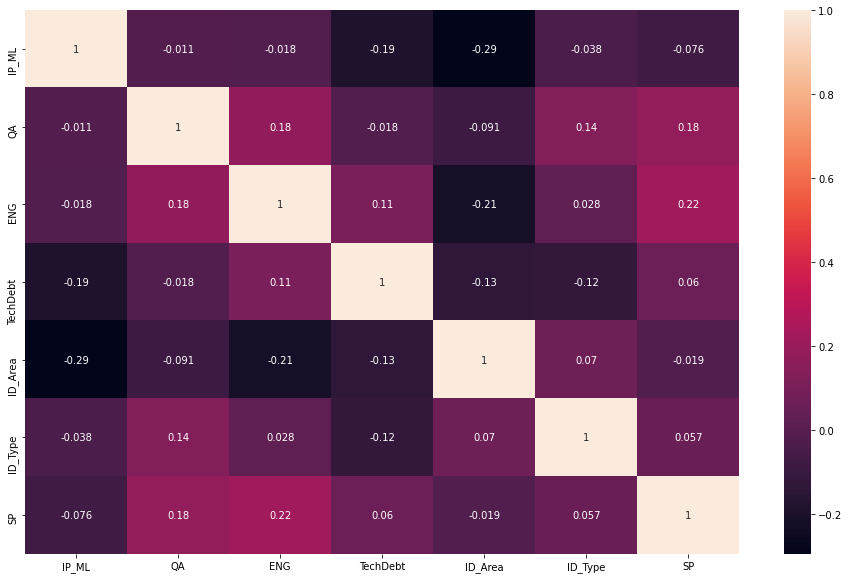

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(train_df.corr(), annot=True)
plt.show()

In [ ]:
train_df.columns

Index(['IP_ML', 'QA', 'ENG', 'TechDebt', 'ID_Area', 'ID_Type', 'SP'], dtype='object')

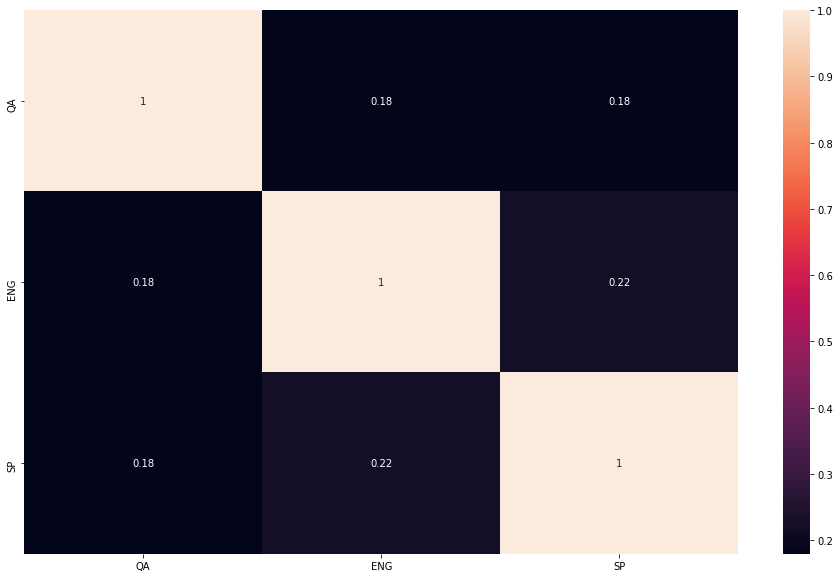

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(train_df[['QA', 'ENG', 'SP']].corr(), annot=True)
plt.show()

**Conclusion**

As seen in the previous correlation matrix, there is a weak correlation between the dependant variable and the independent variables. Only category variables show a small correlation, QA and ENG, which is not enough to be considered for a good model performance. (from Corr > 0.5).


# Feature analysis with Team Members included

In the following experiment, we are going to visualize if there is a correlation with the dependant variable SP and Team Members, and the correlation between Team Members and the rest of the variables. 

The intention of the experiment is to analyze if depending on the team member, we can predict the SPs, and if with work to be done, we can predict Team Members to do the job (Recommendation algorithm)

In [ ]:
# Loading the datasets containing the team members variable
train_df_team = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COB/LAB/Train_3_Sep_Members.csv')

In [ ]:
train_df_team.head()

,IP_ML,QA,ENG,TechDebt,ID_Area,ID_Type,ID_Member,SP
0,11,0,0,0,4,1,35,0
1,11,0,0,0,5,1,35,0
2,11,1,1,0,5,1,35,0
3,11,0,0,0,5,1,35,5
4,11,0,0,0,5,1,35,8


In [ ]:
train_df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   IP_ML      512 non-null    int64
 1   QA         512 non-null    int64
 2   ENG        512 non-null    int64
 3   TechDebt   512 non-null    int64
 4   ID_Area    512 non-null    int64
 5   ID_Type    512 non-null    int64
 6   ID_Member  512 non-null    int64
 7   SP         512 non-null    int64
dtypes: int64(8)
memory usage: 32.1 KB


In [ ]:
# Running correlation Matrix using observations with coming Dtype
train_df_team.corr() # Analyzing Matrix Correlation

,IP_ML,QA,ENG,TechDebt,ID_Area,ID_Type,ID_Member,SP
IP_ML,1.00,-0.07,-0.00,-0.23,-0.35,-0.09,-0.01,-0.13
QA,-0.07,1.00,0.24,0.00,-0.03,0.14,0.01,0.31
ENG,-0.00,0.24,1.00,0.06,-0.19,0.12,-0.04,0.26
TechDebt,-0.23,0.00,0.06,1.00,-0.10,-0.10,-0.05,0.05
ID_Area,-0.35,-0.03,-0.19,-0.10,1.00,-0.03,-0.03,-0.00
ID_Type,-0.09,0.14,0.12,-0.10,-0.03,1.00,-0.01,0.07
ID_Member,-0.01,0.01,-0.04,-0.05,-0.03,-0.01,1.00,-0.00
SP,-0.13,0.31,0.26,0.05,-0.00,0.07,-0.00,1.00


In [ ]:
train_df_team.describe()


,IP_ML,QA,ENG,TechDebt,ID_Area,ID_Type,ID_Member,SP
count,512.00,512.00,512.00,512.00,512.00,512.00,512.00,512.00
mean,27.38,0.62,0.68,0.05,3.65,2.51,16.27,4.26
std,13.91,0.49,0.47,0.22,1.43,2.56,9.35,2.87
min,11.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,14.00,0.00,0.00,0.00,2.00,1.00,8.00,2.00
50%,25.00,1.00,1.00,0.00,4.00,1.00,15.00,3.00
75%,42.00,1.00,1.00,0.00,5.00,4.00,25.00,5.00
max,46.00,1.00,1.00,1.00,5.00,10.00,35.00,13.00
